# Decision Trees
You should build a machine learning pipeline using a decision tree model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a decision tree model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [1]:
import pandas as pd
import sklearn.model_selection
import sklearn.tree
import sklearn.compose
import sklearn.preprocessing
import sklearn.decomposition

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/m-mahdavi/teaching/main/datasets/mnist.csv')
df

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,25268,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,6473,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,5821,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,1751,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_train, df_test = sklearn.model_selection.train_test_split(df)

print('size of df:', df.shape)
print('size of df_train:', df_train.shape)
print('size of df_test:', df_test.shape)

size of df: (4000, 786)
size of df_train: (3000, 786)
size of df_test: (1000, 786)


In [4]:
x_train = df_train.drop(['id','class'], axis = 1)
y_train = df_train['class']

x_test = df_test.drop(['id','class'], axis = 1)
y_test = df_test['class']

###########################

print('x_train size: ', x_train.shape)
print('y_train size: ', y_train.shape)

print('x_test size: ', x_test.shape)
print('y_test size: ', y_test.shape)

x_train size:  (3000, 784)
y_train size:  (3000,)
x_test size:  (1000, 784)
y_test size:  (1000,)


In [5]:
# numerical_attributes = x_train.select_dtypes(include = ['int64']).columns.tolist()

# ct = sklearn.compose.ColumnTransformer([
#     ('standard_scaling', sklearn.preprocessing.StandardScaler(), numerical_attributes)
# ])

# ct.fit(x_train)
# x_train = ct.transform(x_train)
# x_test = ct.transform(x_test)

# pca = sklearn.decomposition.PCA(n_components = 50)

# pca.fit(x_train)
# x_train = pca.transform(x_train)
# x_test = pca.transform(x_test)

print ('x_train size: ', x_train.shape)
print ('y_train size: ', y_train.shape)
print ('x_test size: ', x_test.shape)
print ('y_test size: ', y_test.shape)

x_train size:  (3000, 784)
y_train size:  (3000,)
x_test size:  (1000, 784)
y_test size:  (1000,)


In [6]:
clt = sklearn.tree.DecisionTreeClassifier(criterion = 'entropy')
result = clt.fit(x_train, y_train)
result

DecisionTreeClassifier(criterion='entropy')

In [7]:
y_predicted = clt.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
print(accuracy)
result = sklearn.metrics.classification_report(y_test, y_predicted)
print(result)


0.779
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        83
           1       0.94      0.93      0.93       122
           2       0.73      0.80      0.76       104
           3       0.75      0.74      0.75       107
           4       0.77      0.83      0.80        87
           5       0.65      0.62      0.63        89
           6       0.75      0.73      0.74       104
           7       0.86      0.87      0.86       104
           8       0.72      0.68      0.70       107
           9       0.72      0.73      0.72        93

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000



## Visualize the Decision Tree

In [11]:
import graphviz
from sklearn import tree

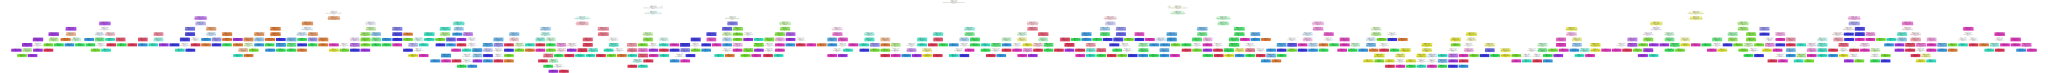

In [15]:
dot_data = tree.export_graphviz(clt, out_file=None,
                                feature_names=x_train.columns,
                                class_names=[str(i) for i in range(10)],
                                filled=True)

graph = graphviz.Source(dot_data, format="png")
graph